In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/shiva/HAM10000_data-20241210T070729Z-001.zip"

Streaming output truncated to the last 5000 lines.
  inflating: HAM10000_data/benign/ISIC_0024558.jpg  
  inflating: HAM10000_data/benign/ISIC_0031210.jpg  
  inflating: HAM10000_data/benign/ISIC_0029487.jpg  
  inflating: HAM10000_data/benign/ISIC_0029375.jpg  
  inflating: HAM10000_data/benign/ISIC_0025666.jpg  
  inflating: HAM10000_data/benign/ISIC_0024677.jpg  
  inflating: HAM10000_data/benign/ISIC_0028013.jpg  
  inflating: HAM10000_data/benign/ISIC_0030686.jpg  
  inflating: HAM10000_data/benign/ISIC_0026088.jpg  
  inflating: HAM10000_data/benign/ISIC_0032127.jpg  
  inflating: HAM10000_data/benign/ISIC_0029648.jpg  
  inflating: HAM10000_data/benign/ISIC_0026662.jpg  
  inflating: HAM10000_data/benign/ISIC_0030671.jpg  
  inflating: HAM10000_data/benign/ISIC_0029590.jpg  
  inflating: HAM10000_data/benign/ISIC_0024905.jpg  
  inflating: HAM10000_data/benign/ISIC_0029136.jpg  
  inflating: HAM10000_data/benign/ISIC_0030043.jpg  
  inflating: HAM10000_data/benign/ISIC_0026612.j

Several libraries that are necessary for different activities in a workflow involving image processing or data analysis are imported by this code block. It manages picture forms and transformations using OpenCV (cv2), and it makes mathematical operations easier with NumPy (nm_py). Pattern-based file path searches are made possible by glob, while the os library assists with handling operating system interfaces. Pandas (pn_ds) is imported for data processing, while Matplotlib (ml_pl) and Seaborn (sns) are loaded for data visualization. The random module introduces randomization, and progress indicators are provided by tqdm to track operations. Pillow (PIL) also provides tools for sophisticated picture enhancement and preprocessing. When combined, these libraries provide organized workflows for file management, data visualization, image processing, and mathematical calculations.

In [ ]:
# using this library we handle image shape
import cv2
#Importing the library to carry out math operations
import numpy as nm_py
# we use this method for handling the operating system
import os
#Module to locate every file path that fits a given pattern
import glob
#applying the method data-frame in order to plot
import matplotlib.pyplot as ml_pl
import random
# Progress bar creation framework
import tqdm
# Preprocessing tools for image data
from PIL import Image,ImageEnhance
from tqdm import tqdm
#getting this library for claculating the processing
import seaborn as sns
##apply this library for manupulation-reviws
import pandas as pn_ds

In [ ]:
HAM10000_data=glob.glob("/content/HAM10000_data/*/*")

In [ ]:
random.shuffle(HAM10000_data)

In [ ]:
len(HAM10000_data)

10015

In [ ]:
HAM10000_data

['/content/HAM10000_data/benign/ISIC_0024726.jpg',
 '/content/HAM10000_data/benign/ISIC_0026832.jpg',
 '/content/HAM10000_data/benign/ISIC_0024706.jpg',
 '/content/HAM10000_data/benign/ISIC_0029382.jpg',
 '/content/HAM10000_data/benign/ISIC_0025749.jpg',
 '/content/HAM10000_data/benign/ISIC_0029279.jpg',
 '/content/HAM10000_data/benign/ISIC_0026128.jpg',
 '/content/HAM10000_data/benign/ISIC_0025612.jpg',
 '/content/HAM10000_data/benign/ISIC_0030276.jpg',
 '/content/HAM10000_data/benign/ISIC_0030567.jpg',
 '/content/HAM10000_data/benign/ISIC_0027816.jpg',
 '/content/HAM10000_data/benign/ISIC_0025373.jpg',
 '/content/HAM10000_data/benign/ISIC_0032109.jpg',
 '/content/HAM10000_data/benign/ISIC_0025366.jpg',
 '/content/HAM10000_data/benign/ISIC_0029778.jpg',
 '/content/HAM10000_data/benign/ISIC_0033769.jpg',
 '/content/HAM10000_data/benign/ISIC_0026011.jpg',
 '/content/HAM10000_data/benign/ISIC_0029346.jpg',
 '/content/HAM10000_data/benign/ISIC_0028923.jpg',
 '/content/HAM10000_data/benign

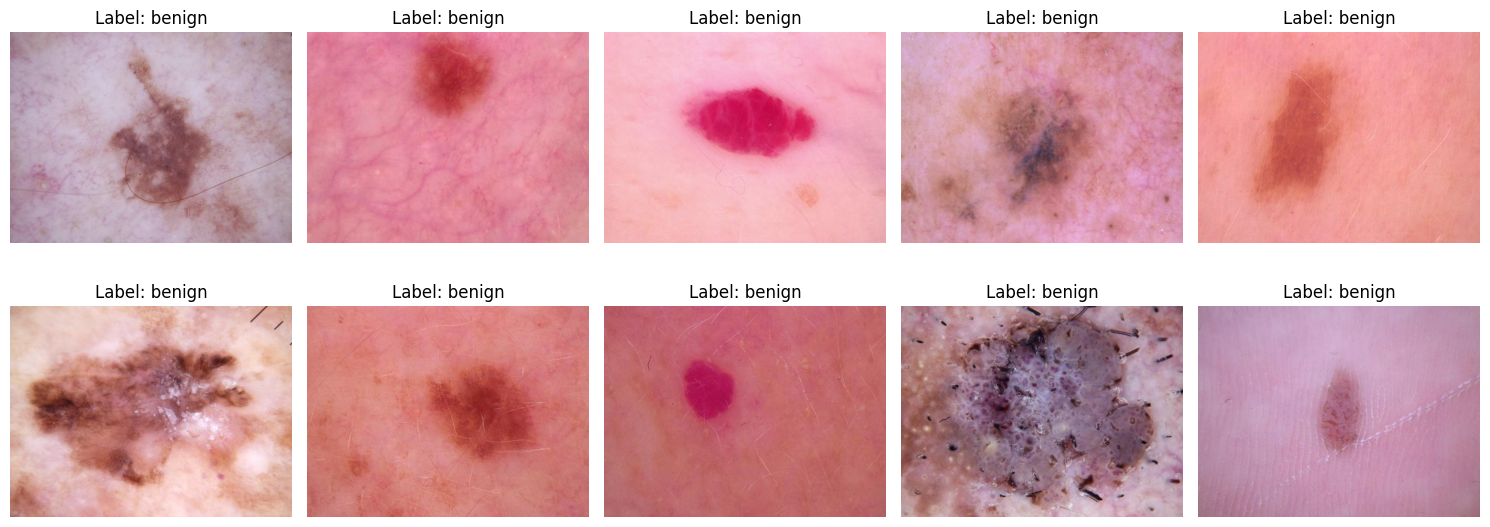

In [ ]:
# Create a figure with subplots (2 rows and 5 columns)
fig, axs = ml_pl.subplots(2, 5, figsize=(15, 6))

# Loop through the first 10 images and display them
for i in range(10):
    image_path = HAM10000_data[i]
    # Extract label from the path
    label = image_path.split('/')[-2]

    # Examine and change the picture
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Determine the subplot location (row, column)
    row = i // 5
    col = i % 5

    # Showing the picture in the subplot.
    axs[row,col].imshow(image)
    # setting the tag in the picture
    axs[row,col].set_title(f"Label: {label}")
    # shut the axis of the image
    axs[row,col].axis('off')

# Adjust the layout to prevent overlap
ml_pl.tight_layout()
ml_pl.show()

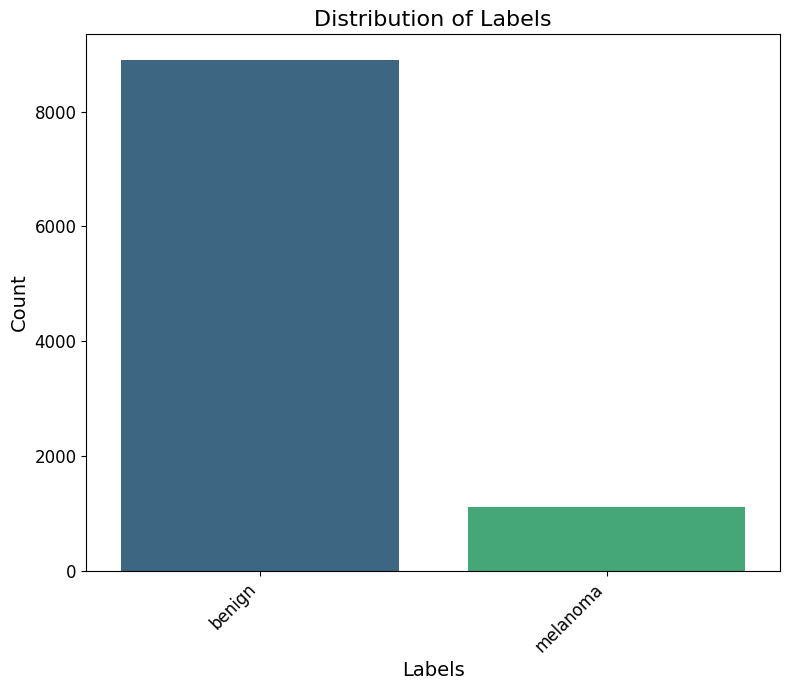

In [ ]:
# 'HAM10000_data' list is already defined as in the previous code
labels = [image_path.split('/')[-2] for image_path in HAM10000_data]

# Determining how many times each label appears.
label_counts = {}
# applying the looping with the models
for label in labels:
   # adding the tag in the image with the valeus
    label_counts[label]=label_counts.get(label, 0) + 1

# Produce a countplot with enhanced visual appeal.
ml_pl.figure(figsize=(8, 7))
sns.countplot(x=labels, hue=labels, palette="viridis", dodge=False, legend=False)
ml_pl.title("Distribution of Labels", fontsize=16)
ml_pl.xlabel("Labels",fontsize=14)
# adding the y-labl in the graph
ml_pl.ylabel("Count",fontsize=14)
# Rotate x-axis labels for readability
ml_pl.xticks(rotation=45, ha="right",fontsize=12)
ml_pl.yticks(fontsize=12)
ml_pl.tight_layout()
ml_pl.show()

In [ ]:
!pip install PyWavelets

In [ ]:
import pywt  # For Discrete Wavelet Transform

# Initialize lists to store processed HAM10000_data and labels
HUM10000_df = []
Labels = []

# Define the label dictionary
label_dict = {
    "benign": 0,
    "melanoma": 1,
}

# Initialize CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

def dwt_denoise(img, wavelet='haar', level=1):
    coeffs = pywt.wavedec2(img, wavelet, level=level)
    # Zero out detail coefficients (thresholding step)
    coeffs_H = list(coeffs)
    coeffs_H[1:] = [(nm_py.zeros_like(cH), nm_py.zeros_like(cV), nm_py.zeros_like(cD)) for cH, cV, cD in coeffs_H[1:]]
    # Reconstruct the image
    denoised_img = pywt.waverec2(coeffs_H, wavelet)
    return nm_py.clip(denoised_img, 0, 255).astype('uint8')

# Use tqdm to iterate through the progress bar.
for i in tqdm.tqdm(range(len(HAM10000_data))):
    #Examining the picture.
    img=cv2.imread(HAM10000_data[i])
    # getting the looping with the image
    if img is None:
        continue

    # To guarantee consistency, resize the picture
    img=cv2.resize(img, (224, 224))

    # To enable DWT denoising, convert the picture to grayscale.
    gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply DWT denoising
    denoised_gray=dwt_denoise(gray_img)

    # Convert back to RGB format for further processing
    denoised_img=cv2.cvtColor(denoised_gray, cv2.COLOR_GRAY2BGR)

    # Normalize pixel values to [0, 1]
    img_Normalize=denoised_img.astype('float32') / 255.0

    # Applying Gaussian blur to the normalized image to reduce noise
    blrd=cv2.GaussianBlur(img_Normalize, (5, 5), 0)

    # Convert the image from BGR to RGB
    RGB_img = cv2.cvtColor(blrd, cv2.COLOR_BGR2RGB)

    # Apply CLAHE to each channel separately for contrast enhancement
    channels=cv2.split(RGB_img)
    enhanced_channels = []

    for channel in channels:
        # Apply CLAHE on each channel (to improve contrast)
        enhanced_channel = clahe.apply((channel * 255).astype('uint8'))
        enhanced_channels.append(enhanced_channel)

    # Merge the enhanced channels back into one image
    enhanced_img = cv2.merge(enhanced_channels)

    # Normalize the enhanced image again
    enhanced_img_normalized = enhanced_img.astype('float32') / 255.0

    # Taking the file location and extract the class label.
    label=HAM10000_data[i].split(os.path.sep)[-2]

    # Verifying whether the label is present in the label dictionary.
    if label in label_dict:
        # Append the processed image to the list
        HUM10000_df.append(enhanced_img_normalized)
        # Append the corresponding label to the label list
        Labels.append(label_dict[label])


100%|██████████| 10015/10015 [00:47<00:00, 209.19it/s]


In [ ]:
# Print the final sizes of the processed HAM10000_data and labels
print(f"Processed {len(HUM10000_df)} images.")
print(f"Corresponding labels count: {len(Labels)}")

Processed 10015 images.
Corresponding labels count: 10015


In [ ]:
# Convert the list of images (HUM10000_df) and labels (Labels) to NumPy arrays.
X = nm_py.array(HUM10000_df)
y = nm_py.array(Labels)
# displaying the shape of the information
print("Shape of X (images):",X.shape)
#showing the information's shape
print("Shape of y (labels):",y.shape)


Shape of X (images): (10015, 224, 224, 3)
Shape of y (labels): (10015,)


In [ ]:
!pip install imbalanced-learn

In [ ]:
from collections import Counter
# using this method we blanace the information
from imblearn.over_sampling import SMOTE
# applying the library for dividing the dataset
from sklearn.model_selection import train_test_split

# Reshape the image
X_reshaped=X.reshape(X.shape[0], -1)
# applying this technique with the models
smote=SMOTE(random_state=42)
# fitting the information with the models
X_smote,Labels_smote=smote.fit_resample(X_reshaped,Labels)

# Returning the picture to its initial form.
X_smote=X_smote.reshape(-1, 224, 224, 3)

# After, print the class distribution.
print("Class distribution after SMOTE:",Counter(Labels_smote))

Class distribution after SMOTE: Counter({0: 8902, 1: 8902})


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,Labels_smote,test_size=0.2,random_state=100)

# Creating NumPy arrays from y_train as well as y_test.
y_train=nm_py.array(y_train)
# Using and to create NumPy arrays
y_test=nm_py.array(y_test)

# Print the shapes of the resulting arrays
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (14243, 224, 224, 3)
Shape of X_test: (3561, 224, 224, 3)
Shape of y_train: (14243,)
Shape of y_test: (3561,)


In [ ]:
# apply this library for converting the type of information
from tensorflow.keras.utils import to_categorical
# fitting the training data
y_train=to_categorical(y_train, num_classes=2)
y_test=to_categorical(y_test, num_classes=2)

In [ ]:
y_train.shape, y_test.shape

((14243, 2), (3561, 2))

#TripleVisionNet (MobileNetV3Large, InceptionV3, EfficientNetB7)Model-

In [ ]:
# To create and train machine learning models, import the TensorFlow library.
import tensorflow as tf
# Using the Keras applications module to import particular pre-trained models
from tensorflow.keras.applications import InceptionV3,MobileNetV3Large
# Adding layers that are frequently seen in neural network designs
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Input,Concatenate,Dropout
# To design a unique model architecture, import the Model class.
from tensorflow.keras.models import Model
# Bringing in a popular optimization technique, the Adam optimizer
from tensorflow.keras.optimizers import Adam
# Adding more previously trained models to facilitate transfer learning
from tensorflow.keras.applications import EfficientNetB7,ResNet101
# Reimporting certain layers to build sophisticated model architectures
from tensorflow.keras.layers import (GlobalAveragePooling2D,Concatenate,Dense,Dropout,Conv2D,MaxPooling2D,Flatten)
# Load the pre-trained models without the top layers (for feature extraction)
mobilenet_v3=MobileNetV3Large(weights='imagenet',include_top=False,input_shape=(224,224,3))
inceptionV3=InceptionV3(weights='imagenet',include_top=False,input_shape=(224,224,3))
efficientnet_b7=EfficientNetB7(weights='imagenet',include_top=False,input_shape=(224,224,3))

# Set the pre-trained models' layers to frozen.
mobilenet_v3.trainable = False
inceptionV3.trainable = False
efficientnet_b7.trainable = False

# Define the model input
input_layer = tf.keras.Input(shape=(224, 224, 3))

# Extract features using the pre-trained models
mobilenet_v3_features = mobilenet_v3(input_layer)
inceptionV3_features = inceptionV3(input_layer)
efficientnet_b7_features = efficientnet_b7(input_layer)

# Global Average Pooling to reduce dimensions of the feature maps
mobilenet_v3_pool = GlobalAveragePooling2D()(mobilenet_v3_features)
inceptionV3_pool = GlobalAveragePooling2D()(inceptionV3_features)
efficientnet_b7_pool = GlobalAveragePooling2D()(efficientnet_b7_features)

# Concatenate the pooled features from all models
concatenated_features = Concatenate()([mobilenet_v3_pool, inceptionV3_pool, efficientnet_b7_pool])

# Self-Adaptive CNN layers (new additional layers)
# Adding a set of Conv2D layers to further refine the feature extraction
x=Conv2D(256,kernel_size=(3,3),activation='relu')(input_layer)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Conv2D(450, kernel_size=(3,3), activation='relu')(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)

# Concatenate with features from pre-trained models
x = Concatenate()([concatenated_features, x])

# Fully connected layers
x=Dense(524,activation='relu')(x)
x=Dropout(0.5)(x)
x=Dense(1020,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(1020,activation='relu')(x)
x=Dropout(0.5)(x)

# Output layer for classification (adjust number of classes as necessary)
output_layer=Dense(2,activation='softmax')(x)

# Giving the finished hybrid model an appropriate name and define it.
hybrid_model=Model(inputs=input_layer,outputs=output_layer,name="hybrid_model")
# compiling the algorithms with the para-meters
hybrid_model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])
# Synopsis of the hybrid model
hybrid_model.summary()


Model: "hybrid_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 222, 222, 256)  │          7,168 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 111, 111, 256)  │              0 │ conv2d_94[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MobileNetV3Large          │ (None, 7, 7, 960)      │      2,996,352 │ input_layer_3[0][0]    │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ inception_v3 (Functional) │ (None, 5, 5, 2048)     │     21,802,784 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ efficientnetb7            │ (None, 7, 7, 2560)     │     64,097,687 │ input_layer_3[0][0]    │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 109, 109, 450)  │      1,037,250 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 960)            │              0 │ MobileNetV3Large[0][0] │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ inception_v3[0][0]     │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2560)           │              0 │ efficientnetb7[0][0]   │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 54, 54, 450)    │              0 │ conv2d_95[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 5568)           │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ global_average_poolin… │
│                           │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 1312200)        │              0 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 1317768)        │              0 │ concatenate_2[0][0],   │
│ (Concatenate)             │                        │                │ flatten[0][0]          │
├──────────────────────

 Total params: 782,031,159 (2.91 GB)

 Trainable params: 693,134,336 (2.58 GB)

 Non-trainable params: 88,896,823 (339.11 MB)

In [ ]:
# applying the method for using the step with given values
from sklearn.model_selection import KFold
#using the step with the given parameters
kf=KFold(n_splits=2,shuffle=True,random_state=100)
fold_no=1

# For storing validation results
all_fold_histories = []
all_fold_scores = []
# applying the looping with parameters
for train_index, val_index in kf.split(X_train):
    # displaying the folding
    print(f"Training on fold {fold_no}...")

    # Split HAM10000_data into train and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Training the algorithms
    history = hybrid_model.fit(X_train_fold, y_train_fold,validation_data=(X_val_fold, y_val_fold),epochs=10,batch_size=50,verbose=1)

    fold_no += 1


Training on fold 1...
Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.5284 - loss: 0.7468 - val_accuracy: 0.6679 - val_loss: 0.6223
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 44s 306ms/step - accuracy: 0.6482 - loss: 0.6290 - val_accuracy: 0.6816 - val_loss: 0.5936
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 43s 303ms/step - accuracy: 0.6847 - loss: 0.5924 - val_accuracy: 0.7005 - val_loss: 0.5719
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 43s 304ms/step - accuracy: 0.7034 - loss: 0.5625 - val_accuracy: 0.7230 - val_loss: 0.5475
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 43s 301ms/step - accuracy: 0.7365 - loss: 0.5225 - val_accuracy: 0.7537 - val_loss: 0.5068
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 44s 305ms/step - accuracy: 0.7878 - loss: 0.4508 - val_accuracy: 0.7822 - val_loss: 0.4667
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 43s 302ms/step - accuracy: 0.8271 - loss: 0.3958 - val_accuracy: 0.7864 - val_loss: 0.4605
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 43s 304ms/step - accura

This code plots loss and accuracy metrics over the training phases in a single figure to display a machine learning model's training history. With proper labels, legends, and a caption, the first subplot in the image shows the training and validation accuracy over epochs, giving a clear picture of the model's performance over time. The preparation and evaluation loss are similarly shown in the second subplot, which provides information on the model's generalization and learning capabilities. Tight_layout() is used to modify the layout for improved visualization, and the plots that result are shown to provide an overview of the model's training as well as validation process.

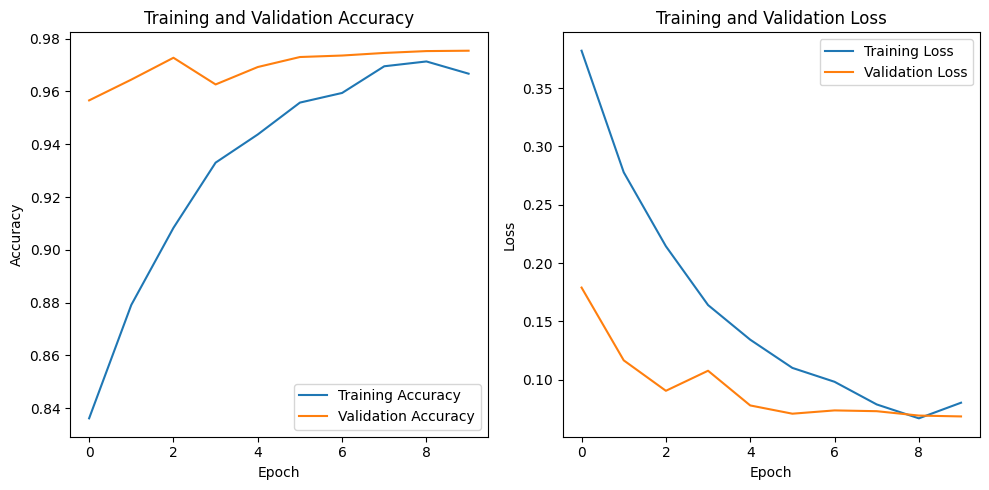

In [ ]:
#plotting training history with a figure size of 10x5
ml_pl.figure(figsize=(10, 5))
# Creating the first subplot for accuracy
ml_pl.subplot(1, 2, 1)
# Charting training accuracy across time periods
ml_pl.plot(history.history['accuracy'],label='Training Accuracy')
# Reliability of validation plotted throughout epochs
ml_pl.plot(history.history['val_accuracy'],label='Validation Accuracy')
# setting the x-label in the plot
ml_pl.xlabel('Epoch')
# adding the ytag in the graph
ml_pl.ylabel('Accuracy')
# printing the legending values in the plot
ml_pl.legend()
# displayig the result
ml_pl.title('Training and Validation Accuracy')
# Construct the second loss subplot.
ml_pl.subplot(1, 2, 2)
# Charting training loss across time periods
ml_pl.plot(history.history['loss'],label='Training Loss')
# Displaying validation loss across time periods
ml_pl.plot(history.history['val_loss'],label='Validation Loss')
# Assigning 'Epoch' as the x-axis label.
ml_pl.xlabel('Epoch')
# Assigning label.
ml_pl.ylabel('Loss')
# adding the legend valus in the plot
ml_pl.legend()
# printing the tittles in the graph
ml_pl.title('Training and Validation Loss')
# added the layout in the plot
ml_pl.tight_layout()
# visualizing the graph
ml_pl.show()

In [ ]:
# getting the valeus with the trained data and showing result
loss,accuracy=hybrid_model.evaluate(X_train_fold,y_train_fold,verbose=0)
# displaying the result with the valeus
print(f"y_train Loss: {loss:.4f}")
#Using the valeus to displaying the outcome
print(f"y_train Accuracy: {accuracy:.4f}")


y_train Loss: 0.0224
y_train Accuracy: 0.9947


In [ ]:
# # displaying the outcome after obtaining the valeus using the training data
loss,accuracy=hybrid_model.evaluate(X_val_fold,y_val_fold,verbose=0)
# showing the outcome with the valeus
print(f"Test Loss: {loss:.4f}")
#Displaying the result using the valeus
print(f"Test Accuracy: {accuracy:.4f}")


Test Loss: 0.0686
Test Accuracy: 0.9754


#Training results

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
## evaluting the socre with the models of testing information
preon=precision_score(y_true,y_pred_classes,average='weighted')
# finding the values with the suitable parameters
rell=recall_score(y_true,y_pred_classes,average='weighted')
# applying the score for the testing dataaset
f1=f1_score(y_true,y_pred_classes,average='weighted')
# displaying the result of the algorithms
print(f"Precision: {preon:.4f}")
# visualize this type of result
print(f"Recall: {rell:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.9947
Recall: 0.9947
F1-score: 0.9947


223/223 ━━━━━━━━━━━━━━━━━━━━ 43s 191ms/step


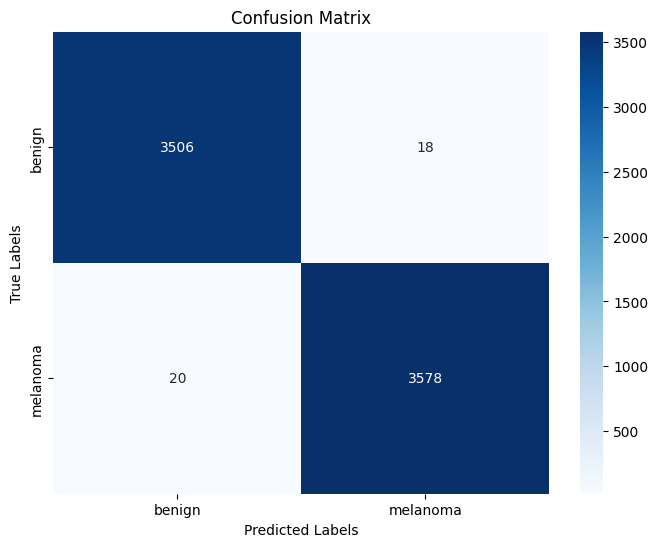

In [ ]:
# calculating the prediction with the trained data
y_pred=hybrid_model.predict(X_train_fold)
y_pred_classes=nm_py.argmax(y_pred,axis=1)
y_true=nm_py.argmax(y_train_fold,axis=1)
# finding the values of this matrics with parameters
conf_matrix=confusion_matrix(y_true,y_pred_classes)
# giving the shape of the graph
ml_pl.figure(figsize=(8, 6))
# drawing the heatmapping with the parameters
sns.heatmap(conf_matrix, annot=True,fmt="d",cmap="Blues",xticklabels=["benign", "melanoma"],yticklabels=["benign", "melanoma"])
#printing the xlabel in the graph
ml_pl.xlabel("Predicted Labels")
# adding the tag in the ylabl
ml_pl.ylabel("True Labels")
# printing the headertext in the matrics
ml_pl.title("Confusion Matrix")
# displaing the matrics
ml_pl.show()

In [ ]:
print(classification_report(y_true,y_pred_classes,target_names=["benign", "melanoma"]))

              precision    recall  f1-score   support

      benign       0.99      0.99      0.99      3524
    melanoma       0.99      0.99      0.99      3598

    accuracy                           0.99      7122
   macro avg       0.99      0.99      0.99      7122
weighted avg       0.99      0.99      0.99      7122



In [ ]:
## Use the hybrid model to forecast the validation set's probability.
y_pred=hybrid_model.predict(X_val_fold)
# Choosing the class to convert expected probability to class labels.
y_pred_classes=nm_py.argmax(y_pred,axis=1)
# Creating class labels from the validation set's one-hot encoded true labels.
y_true_classes=nm_py.argmax(y_val_fold,axis=1)

# Using the parameters and values to calculate the score
accy=accuracy_score(y_true_classes,y_pred_classes)
# Using of the confines and values to calculate the score
precon=precision_score(y_true_classes,y_pred_classes,average='weighted')
# getting the vlaues witht the parameters and values
rel=recall_score(y_true_classes,y_pred_classes,average='weighted')
f1=f1_score(y_true_classes,y_pred_classes,average='weighted')
# dispalying the value of this parameters
print(f"Accuracy: {accy}")
# showing the result of the algorithms
print(f"Precision: {precon}")
# getting the score of themodel
print(f"Recall: {rel}")
print(f"F1-score: {f1}")


223/223 ━━━━━━━━━━━━━━━━━━━━ 30s 135ms/step
Accuracy: 0.9754247998876562
Precision: 0.9754661219841247
Recall: 0.9754247998876562
F1-score: 0.9754245120124174


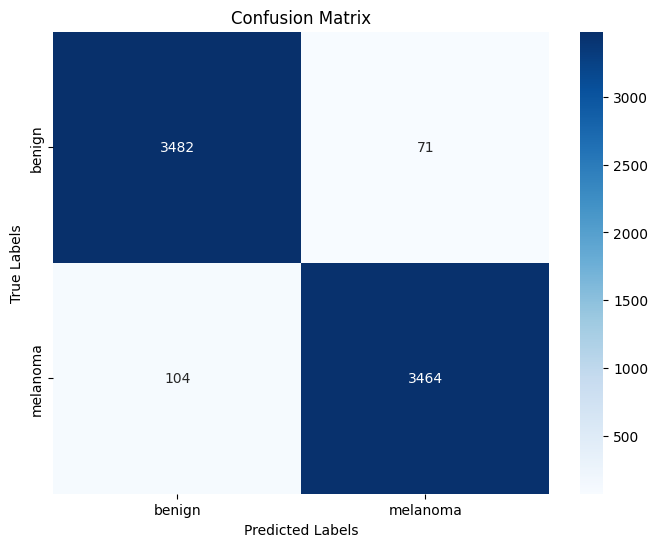

In [ ]:
# finding the values of this matrics with parameters
cm=confusion_matrix(y_true_classes,y_pred_classes)

# Creating a heatmap by plotting the confusion matrices.
ml_pl.figure(figsize=(8, 6))
# displaying the graph with the parameters
sns.heatmap(cm, annot=True,fmt="d",cmap="Blues",xticklabels=["benign", "melanoma"],yticklabels=["benign", "melanoma"])
#printing the xlabel in the graph
ml_pl.xlabel("Predicted Labels")
# adding the tag in the ylabl
ml_pl.ylabel("True Labels")
# setting the headertext in the plot
ml_pl.title("Confusion Matrix")
# visualizing the graph
ml_pl.show()

In [ ]:
print(classification_report(y_true_classes,y_pred_classes,target_names=["benign", "melanoma"]))

              precision    recall  f1-score   support

      benign       0.97      0.98      0.98      3553
    melanoma       0.98      0.97      0.98      3568

    accuracy                           0.98      7121
   macro avg       0.98      0.98      0.98      7121
weighted avg       0.98      0.98      0.98      7121



This code analyzes and displays the predictions made by a hybrid model for the first ten photographs in the validation set. The model's anticipated probabilities for the first ten photos are first obtained, and the index with the greatest probability is then used to translate the images into class labels. The numerical class indices are mapped back to their respective label names using a reversed label dictionary. The photos are shown in a grid of subplots, each of which is labeled with the real class, predicted class, and if the prediction was accurate. To ensure proper color representation, images undergo translation from BGR to RGB.The code iterates over the ten photos, showing each one along with its actual and expected labels, as well as if the prediction was correct. The plot is then shown after the layout has been modified to give a visual representation of the model's performance on these ten samples.

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


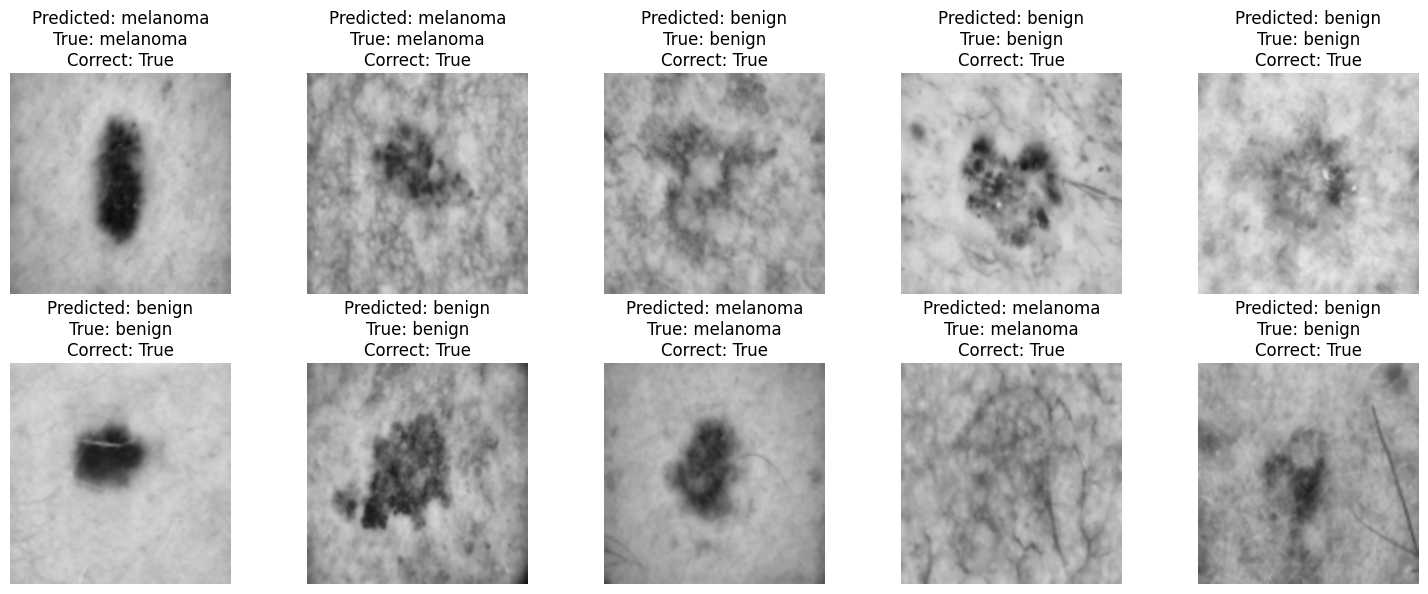

In [ ]:
# Obtain forecasts for the validation set's initial ten photos.
predictions=hybrid_model.predict(X_val_fold[:10])
# calculating the values of the models
predicted_labels=nm_py.argmax(predictions,axis=1)

# Reverse the label dictionary to map indices back to label names
label_dict_reversed={v: k for k, v in label_dict.items()}

# Present the pictures along with the anticipated labels.
fig,axes=ml_pl.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    # Getting the pictures and convert from BGR to RGB for correct color display
    image=X_val_fold[i]
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get predicted and true labels
    predicted_class = label_dict_reversed.get(predicted_labels[i], "Unknown")

    # Get the index of the true class from the one-hot encoded label
    true_class_index = nm_py.argmax(y_val_fold[i])
    true_class = label_dict_reversed.get(true_class_index, "Unknown") # Use the index to get the class name

    # Determine if the prediction is correct
    is_correct = "True" if predicted_class == true_class else "False"

    # Showing the picture with the real and expected labels.
    ax.imshow(image)
    ax.set_title(f"Predicted: {predicted_class}\nTrue: {true_class}\nCorrect: {is_correct}")
    ax.axis('off')

ml_pl.tight_layout()
ml_pl.show()